# Julia Fractals

## Logistic Map

In this notebooks we will explore the fractal nature of iteratively applied quadratic maps. Quadratic maps are polynomials of the form

\begin{equation}
f(z) = az^2+bz+c.
\end{equation}

As an example you've already encountered the logistic map

\begin{equation}
f(z) = rz(1-z) = -rz^2 + rz,
\end{equation}

and learned about the chaotic nature of the map depending on the choice of r.


Let's quickly recap the logistic map. We import our modules and define the logistic map as a python function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings about overflows and NaNs
np.seterr(over='ignore', invalid='ignore')

def logistic(z, r):
    return r*z*(1-z)

We explore the $r$-range from $2.4$ to $4.0$:

In [2]:
r = np.linspace(2.4, 4, 200)

We arbitrarily start with $z_0=0.5$ for each $r$-value:

In [3]:
z = np.ones(200) * 0.5

We then apply the logistic map 1000 times and plot the last 100 steps of each orbit:

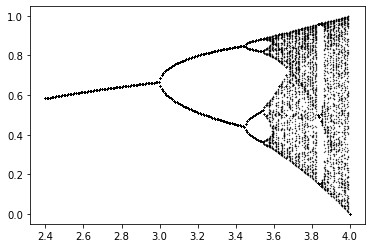

In [4]:
for i in range(1000):
    z = logistic(z,r)
    if(i>900):
        plt.scatter(r,z,c='k', s=0.1)

Clearly visible at $r=3.0$ is the first period doubling. The second doubling happens at around $r\approx 3.45$ and after $r\approx 3.56995$ the cascade ends and the system exhibits *chaotic* behaviour.

## Divergence

The stability of the system depends upon the initial value $z_0$. For fixed $r=3.2$, let's check the first 10 iterations for a range of initial values $z_0\in [0,1]$. We draw the logarithm of the magnitude of all $z_n$:

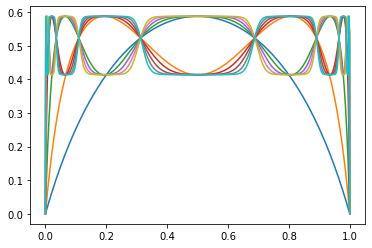

In [5]:
r = 3.2

x0 = np.linspace(0,1,1000)
x = x0

for i in range(10):
    x = logistic(x, r)k
    plt.plot(x0,np.log(1+np.abs(x)))

As expected we see the values converge to the 2-step limit cycle. However, outside the interval the series quickly diverges:

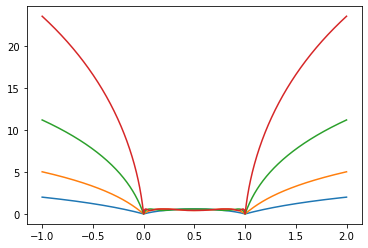

In [6]:
x0 = np.linspace(-1,2,1000)
x = x0

for i in range(4):
    x = logistic(x, r)
    plt.plot(x0,np.log(1+np.abs(x)))

There is fascinating structure to be found in the divergence behaviour of the logistic map.

<font color=red>Write a function that checks an array of initial values for divergence.</font> This can be done via a *bailout* criterion: When the absolute value of a step $z_n$ becomes larger than a certain *bailout radius*, the series is guaranteed to diverge. For the logistic map, the bailout radius is 2. Do `n` steps and then check the absolute value:

In [12]:
# z = NumPy array of initial values to be checked
# r = r-value of logistic map
# n = number of iterations of the logistic map on z

def bailout(z, r, n):
    # 1. Apply the logistic()-function n times
    for i in range(n):
        z = logistic(z,r)
    # 2. Return if the absolute value of
    #    iterated z is smaller than 2 (as logic array)
    return abs(z)<2

<font color=red>Check your function with the following code.</font> You should recover the interval $[0,1]$ as non-diverging:

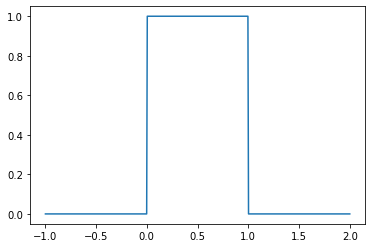

In [14]:
x = np.linspace(-1, 2, 500)
plt.plot(x,bailout(x, 3.2, 100))

The plot should look like this:

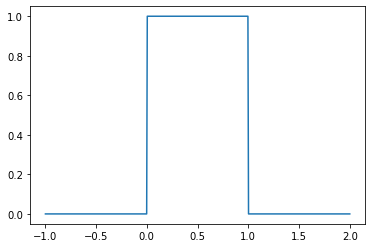

In [9]:
plt.plot(x,np.logical_and(x>0,x < 1))

## Complex arguments

The logistic map is easily extended to the complex plane by simply making $z$ and $r$ complex values.

<font color=red>Generate a grid `z` in the complex plane, ranging from $real($ `z` $)\in[0,1]$ and $imag($ `z` $)\in[-0.5,0.5]$.</font> For that, use `meshgrid` to generate a grid of real and imaginary parts and then add them up, multiplying the imaginary part with the imaginary unit `1j`. Use 500 gridpoints per dimension:

In [21]:
real = np.linspace(0,1,500)
imag = np.linspace(-0.5,0.5,500)
REAL, IMAG = np.meshgrid(real,imag)
z = REAL + 1j*IMAG

<font color=red>Determine the divergence of `z` for $r=3.2$ and draw the resulting logic array with `np.imshow()`.</font> Use `n=150` steps:

Important: Depending on your function you'll want to hand `z.copy()` to your function, to prevent alteration!

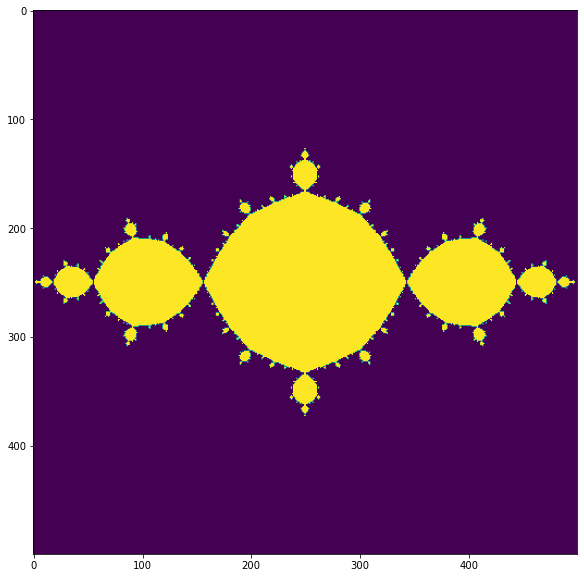

In [22]:
plt.figure(figsize=(10, 10))
plt.imshow(bailout(z.copy(),3.2,150))

A quite complex structure emerges.
<font color=red>Try again with $r=3.2 + 0.2i$, which you can write as `3.2 + 0.2j` in python:</font>


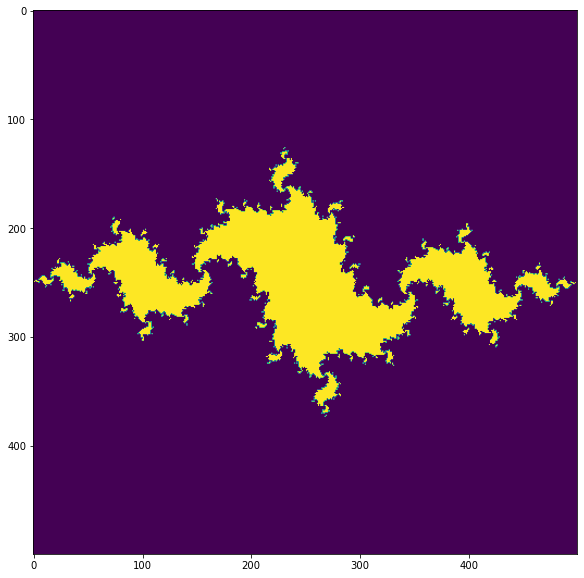

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(bailout(z.copy(),3.2+0.2j,150))

If you try out different $r$ you'll notice that for some values (for example $3.2+0.3i$) there don't seem to be any non-diverging orbits. That is actually not the case. There's still an uncountable set of initial conditions that lead to a non-diverging orbit. However, the set is not connected (called a *cantor set / space*), which means that the probability of actually hitting such a orbit with our meshgrid is almost zero.

The set can still be visualized. For that we need to look at the *rate of divergence*. The *closer* an initial value $z_0$ is to the cantor set, the longer it will take for the orbit to diverge.

<font color=red>Write a new function that determines the index $n$ of the first element $z_n$ that leaves the bailout radius.</font> For a better visual contrast return the *logarithm* of $n$. Make sure that the function works for NumPy arrays:

In [25]:
def bailout_steps(z, r, n):
    z = np.array(z).copy()
    count = np.ones(z.shape)
    for i in range(n):
        ix = np.abs(z) < 2
        z[ix] = logistic(z[ix], r)
        count[ix] += 1

    return np.log(count)


<font color=red>Apply the `bailout_steps()` function to the complex grid and draw the resulting array as an image.</font>

Important: Depending on your function you'll want to hand `z.copy()` to your function, to prevent alteration!

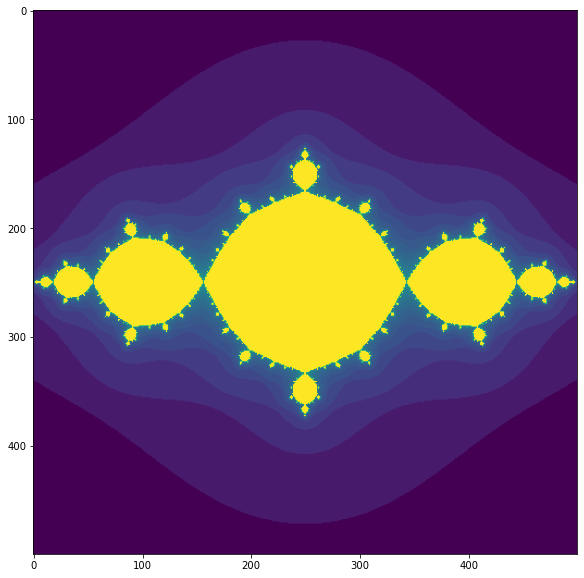

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(bailout_steps(z,3.2,150))

Aside from a much more pleasing look, this now also allows us the figure the set in cases it is sparse. 

<font color=red>Render the fractal for $r=3.2+0.25i$ </font>

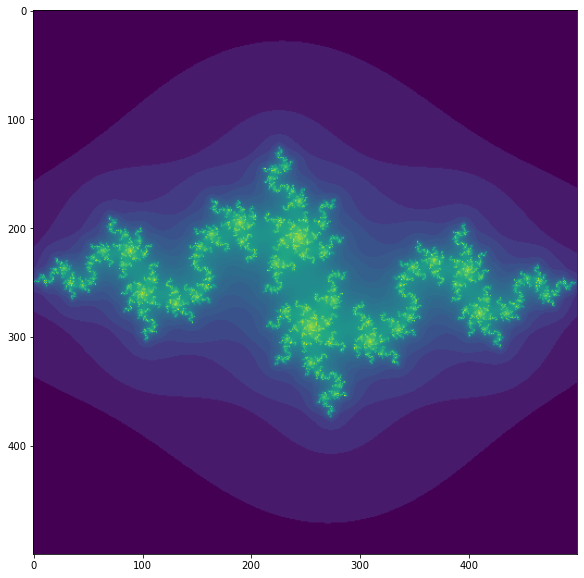

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(bailout_steps(z,3.2+0.25j,150))

The inside of the non-diverging set is called the Fatou set. All orbits in the Fatou set will have a periodic limit cycle. The boundary of the Fatou set is the Julia set, consisting of chaotic orbits that react drastic to small changes in the initial condition. Both sets are fractal in general, meaning their dimensionality is neither 1D nor 2D, but (with a generalized notion of measure) somewhere in between.

You've learned that at around $r\approx 3.56995$ the logistic map switches from periodic orbits to chaotic behaviour. Draw the Julia fractal for a real $r$ slightly below and slightly above this threshold, as well as for $r=4$ and $r>4$:

We can see that above the threshold value, there are no connected regions of periodicity on the real number line anymore. There are still solitary orbits on the real numbers with finite cycles, called a Fatou dust, but as a Cantor space there's almost zero possibility of hitting one (certainly not with floating point numbers).

The entire real number line is now part of the Julia set, coinciding with the chaotic nature of the logistic map. At $r=4$ the julia set is exactly the $[0,1]$ interval. Above $r>4$ the dust Fatou thins out and most orbits are now diverging.

## Mandelbrot Fractals

Instead of changing the initial values $z_0$ for a fixed $r$ and studying the divergence, we can look at different values of $r$ for a fixed $z_0$. The stable regions will fall into a class of *Mandelbrot fractals*, the most famous example being for the monic polynomial

\begin{equation}
f(z) = z^2+r,\quad z_0=0
\end{equation}

We will continue to use the logistic map.

Using your function `bailout()`, <font color=red>render the non-diverging region</font> for $z_0=0.5$, varying $r$ in the rectangle from $-2-3i$ to $4+3i$. You should be able to use `bailout()` unaltered, feeding it the constant $z_0$ and an array of $r$-values.

In [ ]:
???
r = REAL + 1j*IMAG

plt.figure(figsize=(10, 10))
plt.imshow(???)

For nicer visuals, <font color=red>write a new function based on `bailout_steps()` that works with an array of $r$ values instead of a constant</font> and draw the fractal with the new function.

Tip: Be sure to set an arrays datatype to `complex` if you create an array with `np.ones` or `np.zeros`.

This is done like this: (`np.ones(..., dtype=complex)`)

In [ ]:
def bailout_steps_variable_r(z, r, n):
    ???

plt.figure(figsize=(10, 10))
plt.imshow(???)

Incidentally, all the complex values in the Mandelbrot set are precisely the $r$ values for which the corresponding Julia set is connected.

## Happy Holidays!